In [5]:
# Correlation matrix
import pandas as pd
data = {
 'x': [45, 37, 42],
 'y': [38, 31, 26],
 'z': [10, 15, 17]
}
dataframe = pd.DataFrame(data, columns=['x', 'y', 'z'])
print("Dataframe is : ")
print(dataframe)
matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)

Dataframe is : 
    x   y   z
0  45  38  10
1  37  31  15
2  42  26  17
Correlation matrix is : 
          x         y         z
x  1.000000  0.458388 -0.583324
y  0.458388  1.000000 -0.989268
z -0.583324 -0.989268  1.000000


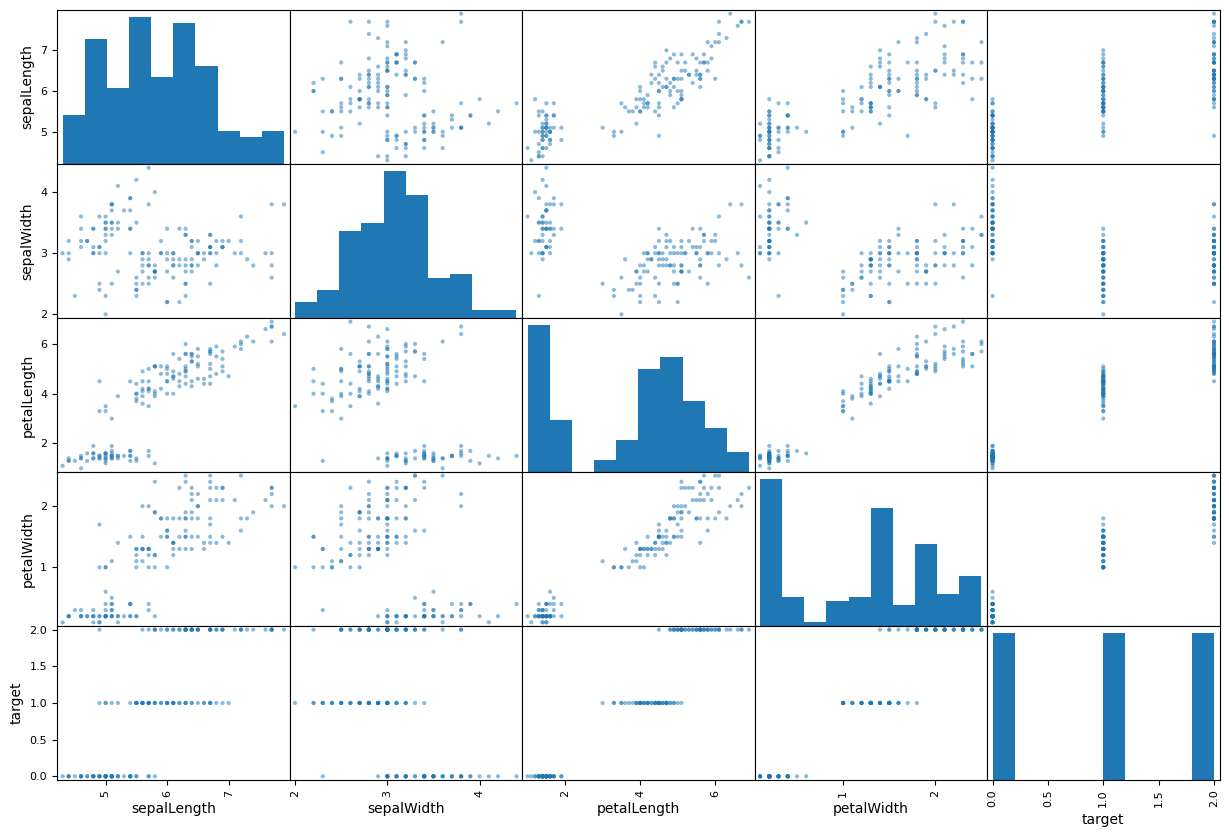

F_value=49.160040089612075, P_value=4.492017133309115e-17
****** REJECT NULL HYPOTHESIS ******
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


In [20]:
#Analysis of covariance: variance (ANOVA) 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pandas.plotting import scatter_matrix

# Load Iris dataset
iris = load_iris()
dataframe_iris = pd.DataFrame(iris.data, columns=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'])
dataframe_iris['target'] = iris.target

# Scatter Matrix
scatter_matrix(dataframe_iris, figsize=(15, 10))
plt.show()

# ANOVA Test
F_value, P_value = stats.f_oneway(
    dataframe_iris['sepalWidth'][dataframe_iris['target'] == 0],
    dataframe_iris['sepalWidth'][dataframe_iris['target'] == 1],
    dataframe_iris['sepalWidth'][dataframe_iris['target'] == 2]
)
print(f"F_value={F_value}, P_value={P_value}")
print("****** REJECT NULL HYPOTHESIS ******" if P_value < 0.05 else "****** ACCEPT NULL HYPOTHESIS ******")

# Tukey's HSD Test
print(pairwise_tukeyhsd(dataframe_iris['sepalWidth'], dataframe_iris['target'], alpha=0.05))


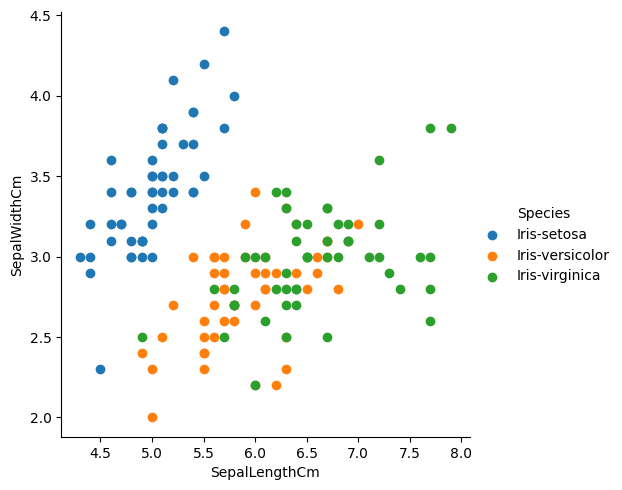

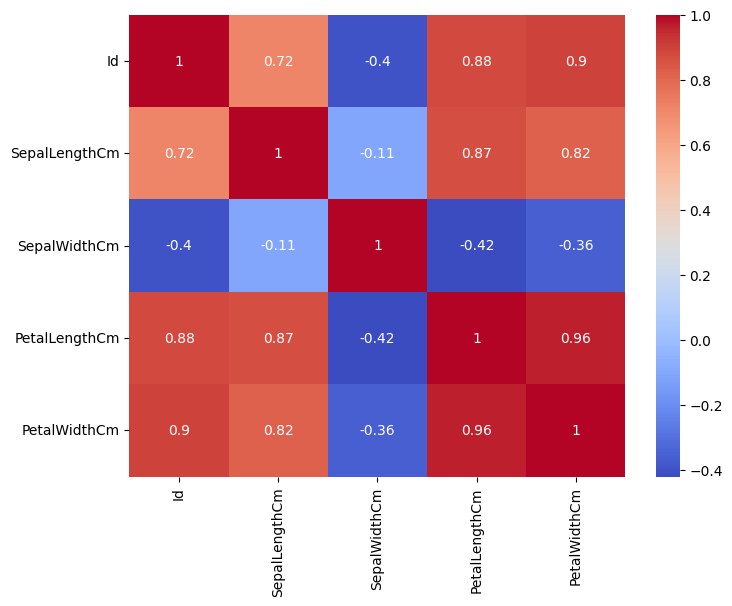

In [21]:
#Plot the correlation plot on dataset and visualize 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = pd.read_csv("Iris.csv")
g = sns.FacetGrid(dataframe, hue="Species", height=5)
g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
numeric_dataframe = dataframe.select_dtypes(include=['float64', 'int64']) 
corr = numeric_dataframe.corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm', annot=True)
plt.show()
